# Project - Mikko Malmi 308090
## Double pendulum


A double pendulum is a system, where two pendulums are chained together. This causes the system to be quite unpredictable and chaotic. However, for some initial positions, the system exhibits periodic movement. In this project, I investigate when this transition between periodic and chaotic regions occur. I have two hypotheses for this project. First, I predict there to be a critical amount of energy for the system, above which the system will always turn chaotic. Below this energy the system should stay periodic. Second, I expect the Fourier transform of the positions of the bobs to depend on how chaotic the system is. In periodic system the transform should have only few distinct peaks, while in chaotic system there should be a broader distribution. I predict that even in the chaotic case, these should be identifiable peaks in the transform.

<img src="dpend.png" width="300" />


Concider a double pendulum hanging from the pivot (at origin), like the one in the above picture. The pendulum has two massless rods with lenghts $l_1$ and $l_2$, and two bobs with masses $m_1$ and $m_2$. The locations of the bobs are 
\begin{equation}
\begin{cases}
\mathbf{r}_1=l_1(\sin\theta_1,\,\cos\theta_1) \\
\mathbf{r}_2=\mathbf{r}_1+l_2(\sin\theta_2,\,\cos\theta_2)
\end{cases}.
\end{equation}
The kinetic and potential energies of the system are 
\begin{equation}
\begin{cases}
\mathrm{T}=\frac{1}{2}m_1|\mathbf{\dot{r}}_1|+\frac{1}{2}m_2|\mathbf{\dot{r}}_2|=
\frac{1}{2}(m_1+m_2)l_1^2\dot{\theta}_1^2+\frac{1}{2}m_2l_2^2\dot{\theta}_2^2+m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1-\theta_2) \\
\mathrm{V}=-g(m_1+m_2)l_1\cos\theta_1-gm_2l_2\cos\theta_2+const
\end{cases},
\end{equation}
and with these we can write the Lagrangian
\begin{equation}
\mathcal{L}=\mathrm{T}-\mathrm{V}=
\frac{1}{2}(m_1+m_2)l_1^2\dot{\theta}_1^2+\frac{1}{2}m_2l_2^2\dot{\theta}_2^2+m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1-\theta_2)
+g(m_1+m_2)l_1\cos\theta_1+gm_2l_2\cos\theta_2-const.
\end{equation}
Now we can write the Lagrangian equations:
\begin{equation}
\begin{cases}
\frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial\mathcal{L}}{\dot{\theta}_1}-\frac{\partial\mathcal{L}}{\theta_1}=0 \\
\frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial\mathcal{L}}{\dot{\theta}_2}-\frac{\partial\mathcal{L}}{\theta_2}=0
\end{cases},
\end{equation}
which lead to the equations:
\begin{equation}
\begin{cases}
(m_1+m_2)l_1\ddot{\theta}_1+m_2l_2\ddot{\theta}_2\cos(\theta_1-\theta_2)+m_2l_2\dot{\theta}_2^2\sin(\theta_1-\theta_2)+g(m_1+m_2)\sin\theta_1=0 \\
l_2\ddot{\theta}_2+l_1\ddot{\theta}_1\cos(\theta_1-\theta_2)-l_1\dot{\theta}_1^2\sin(\theta_1-\theta_2)+g\sin\theta_2=0
\end{cases}.
\end{equation}

Choosing $m_1=m_2$ and $l_1=l_2$ to simplify the equations, we get
\begin{equation}
\begin{cases}
2\ddot{\theta}_1+\ddot{\theta}_2\cos(\theta_1-\theta_2)+\dot{\theta}_2^2\sin(\theta_1-\theta_2)+2\frac{g}{l}\sin\theta_1=0 \\
\ddot{\theta}_2+\ddot{\theta}_1\cos(\theta_1-\theta_2)-\dot{\theta}_1^2\sin(\theta_1-\theta_2)+\frac{g}{l}\sin\theta_2=0
\end{cases}.
\end{equation}
These equations cannot be solved analytically, but we can solve them numerically. First we need to rewrite the equations:
\begin{equation}
\begin{cases}
\dot{\theta}_1=\omega_1 \\
\dot{\theta}_2=\omega_2 \\
\dot{\omega}_1=\frac{\cos(\theta_1-\theta_2)(-\omega_1^2\sin(\theta_1-\theta_2)+\frac{g}{l}\sin\theta_2)-\omega_2^2\sin(\theta_1-\theta_2)-2\frac{g}{l}\sin\theta_1}{2-\cos^2(\theta_1-\theta_2)} \\
\dot{\omega}_2=\frac{\cos(\theta_1-\theta_2)(\omega_2^2\sin(\theta_1-\theta_2)+2\frac{g}{l}\sin\theta_1)+2\omega_1^2\sin(\theta_1-\theta_2)-2\frac{g}{l}\sin\theta_2}{2-\cos^2(\theta_1-\theta_2)}
\end{cases}.
\end{equation}
Now we can write the function and an RK4 solver. The RK4 will not conserve energy, however, since it is a 4th order method, it is more accurate than leapfrog.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin,cos,pi

def f(r,gl):
    t1 = r[0]
    t2 = r[1]
    w1 = r[2]
    w2 = r[3]
    
    dt = t1-t2
    sinDt = sin(dt)
    cosDt = cos(dt)
    glSinT1 = gl*sin(t1)
    glSinT2 = gl*sin(t2)
    w1_2sinDt = w1*w1*sinDt
    w2_2sinDt = w2*w2*sinDt
    
    low = 1.0/(2-cosDt*cosDt)
    dw1 = (cosDt*(-w1_2sinDt+glSinT2)-w2_2sinDt-2*glSinT1)*low
    dw2 = (cosDt*(w2_2sinDt+2*glSinT1)+2*(w1_2sinDt-glSinT2))*low
    dt1 = w1
    dt2 = w2
    return np.array([dt1, dt2, dw1, dw2],float)

In [2]:
def RK4solver(b, N, r0, gl):
    a = 0.0;
    h = (b-a)/N
    tpoints =  np.arange(a,b,h)
    t1points = np.empty(N)
    t2points = np.empty(N)
    w1points = np.empty(N)
    w2points = np.empty(N)
    r = r0.copy()
    for i in range(N):
        t1points[i] = r[0]
        t2points[i] = r[1]
        w1points[i] = r[2]
        w2points[i] = r[3]
        k1 = h*f(r,gl)
        k2 = h*f(r+0.5*k1,gl)
        k3 = h*f(r+0.5*k2,gl)
        k4 = h*f(r+k3,gl)
        r += (k1+2*k2+2*k3+k4)/6
    return tpoints, t1points, t2points, w1points, w2points

We can also visualize the double pendulum

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

def animatePendulum(b, N, r0s, gls):
    n = r0s.size // 4 # Number of pendulums
    t1p = np.empty([n,N])
    t2p = np.empty([n,N])
    
    for i in range(n):
        if n>1:
            tpoints, t1points, t2points, w1points, w2points = RK4solver(b, N, r0s[i,:], gls[i])
        else:
            tpoints, t1points, t2points, w1points, w2points = RK4solver(b, N, r0s, gls)
        t1p[i,:] = t1points
        t2p[i,:] = t2points
        
    x1 = np.sin(t1p)
    y1 = -np.cos(t1p)
    x2 = np.sin(t2p) + x1
    y2 = -np.cos(t2p) + y1
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(autoscale_on=False, xlim=(-3, 3), ylim=(-3, 3.))
    ax.set_aspect('equal')
    
    lines = []
    
    for i in range(n):
        lines.append(ax.plot([], [], 'o-', lw=2))
    
    def animate(i):
        i *= 10
        for j in range(n):
            x = [0, x1[j,i], x2[j,i]]
            y = [0, y1[j,i], y2[j,i]]
            lines[j][0].set_data(x, y)
    
    return animation.FuncAnimation(fig, animate, N//10, interval=30)

Here is a periodic double pendulum

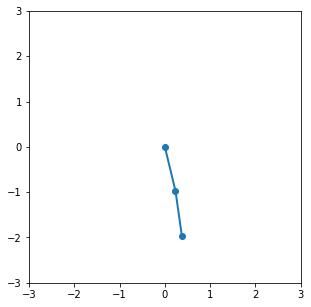

In [4]:
b = 100
N = 100*b
r0 = np.array([0,pi/4.0,0.0,0.0])
gl = 1

anim = animatePendulum(b, N, r0, gl)
HTML(anim.to_html5_video())

Here is a very chaotic double pendulum

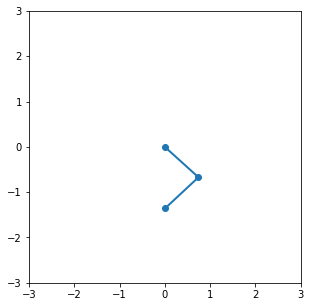

In [5]:
b = 100
N = 100*b
r0 = np.array([pi,pi/4.0,0.0,0.0])
gl = 1

anim = animatePendulum(b, N, r0, gl)
HTML(anim.to_html5_video())

If we visualize multiple chaotic double pendulums with slightly different initial conditions, their paths diverge. The smaller the difference is, the longer it will take for this to happen. Nevertheless, even small differences cause the divergence.

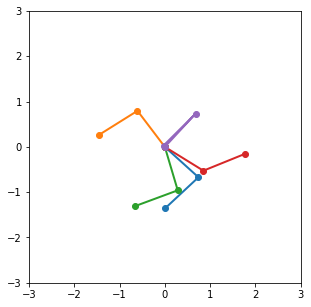

In [6]:
b = 100
N = 100*b
# Give a tiny amount of initial speed for the other pendulums
r0 = np.array([[pi,pi/4.0,0.0,0.0],[pi,pi/4.0,0.0,0.01],[pi,pi/4.0,0.0,0.001],[pi,pi/4.0,0.0,0.0001],[pi,pi/4.0,0.0,0.00001]])
gl = np.array([1,1,1,1,1])

anim = animatePendulum(b, N, r0, gl)
HTML(anim.to_html5_video())

Repeating the process for periodic pendulum, the story is different:

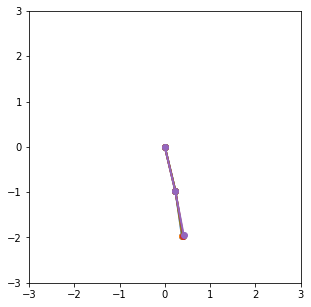

In [7]:
b = 100
N = 100*b

r0 = np.array([[0,pi/4.0,0.0,0.0],[0,pi/4.0,0.0,0.01],[0,pi/4.0,0.0,0.02],[0,pi/4.0,0.0,0.03],[0,pi/4.0,0.0,0.04]])
gl = np.array([1,1,1,1,1])

anim = animatePendulum(b, N, r0, gl)
HTML(anim.to_html5_video())

Even though the differences are significantly larger than in the chaotic animation, the divergence is barely noticeable.

The interesting question now is that where is the limit? Is there a point above which the system turns chaotic? In order to evaluate this, we will need some metrics that can characterisize how chaotic the system is. One example of such metric is the time it takes for two systems, with slightly different initial conditions, to deviate significantly. Other is to evaluate how "clean" the fourier transforms of the positions with respect to time are. That should indicate how predictable the behavior of the system is based on the initial values. Let us first look at the positions of the periodic and chaotic systems.

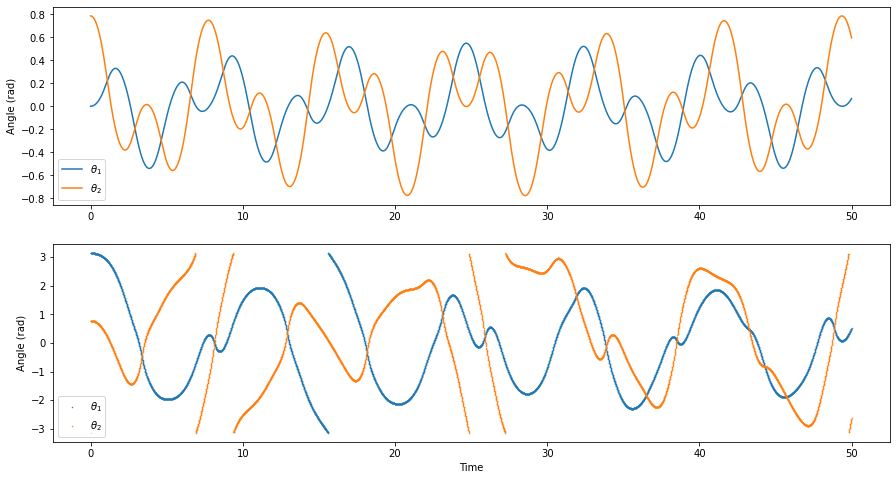

In [8]:
b = 50
N = 100*b
r0_p = np.array([0,pi/4.0,0.0,0.0])
r0_c = np.array([pi,pi/4.0,0.0,0.0])
gl = 1
tpoints, t1p_p, t2p_p, w1p_p, w2p_p = RK4solver(b, N, r0_p, gl)
tpoints, t1p_c, t2p_c, w1p_c, w2p_c = RK4solver(b, N, r0_c, gl)

plt.figure(1, figsize=[15, 8])
plt.subplot(211)
plt.plot(tpoints,t1p_p,label='$θ_1$')
plt.plot(tpoints,t2p_p,label='$θ_2$')

plt.ylabel('Angle (rad)')
plt.legend()
plt.subplot(212)

piArr = np.ones(N) * pi # Position mod 2*pi
t1p_cM = (t1p_c + piArr) % (2*pi) - piArr
t2p_cM = (t2p_c + piArr) % (2*pi) - piArr

plt.plot(tpoints,t1p_cM,'.',label='$θ_1$',markersize=1)
plt.plot(tpoints,t2p_cM,'.',label='$θ_2$',markersize=1)
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()

From these graphs, it is quite easy to see which one is periodic and which is chaotic. Let us calculate and plot the fourier transforms as well:

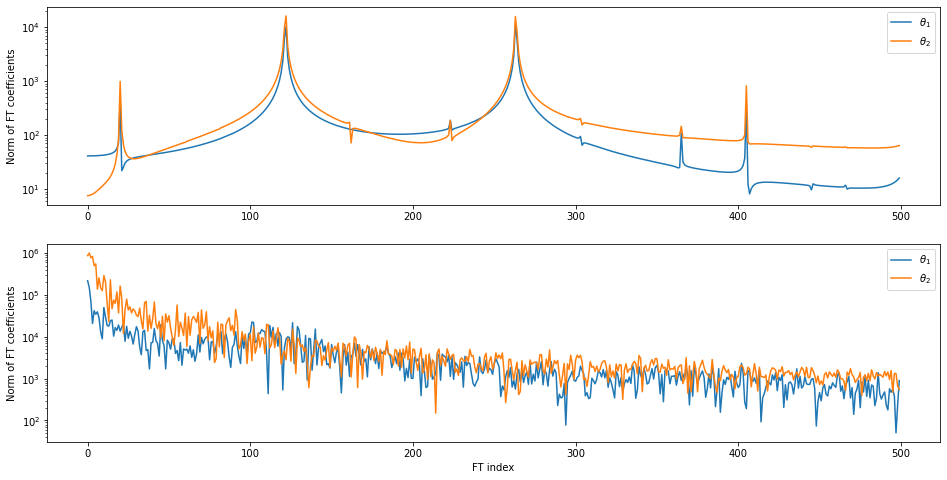

In [10]:
b = 1000 # Longer timescale will emphasize the difference
N = 100*b
r0_p = np.array([0,pi/4.0,0.0,0.0])
r0_c = np.array([pi,pi/4.0,0.0,0.0])
gl = 1
tpoints, t1p_p, t2p_p, w1p_p, w2p_p = RK4solver(b, N, r0_p, gl)
tpoints, t1p_c, t2p_c, w1p_c, w2p_c = RK4solver(b, N, r0_c, gl)

plt.figure(1, figsize=[16, 8])
ax = plt.subplot(211)

t1p_pF = np.abs(np.fft.fft(t1p_p))
t2p_pF = np.abs(np.fft.fft(t2p_p))

plt.plot(t1p_pF[0:500],label='$θ_1$')
plt.plot(t2p_pF[0:500],label='$θ_2$')
ax.set_yscale('log')
plt.ylabel('Norm of FT coefficients')
plt.legend()
ax = plt.subplot(212)

t1p_cF = np.abs(np.fft.fft(t1p_c))
t2p_cF = np.abs(np.fft.fft(t2p_c))

plt.plot(t1p_cF[0:500],label='$θ_1$',markersize=1)
plt.plot(t2p_cF[0:500],label='$θ_2$',markersize=1)
ax.set_yscale('log')
plt.xlabel('FT index')
plt.ylabel('Norm of FT coefficients')
plt.legend()

As we can see, the periodic pendulum has a smooth distribution with few peaks, while the chaotic one has much wider and noisier distribution and it is peaked near the first component. To evaluate how noisy this data is, we'll calculate how often the direction of the function (Fourier transform) changes and where the peak is. These should indicate when the transition between very periodic and more chaotic oscillations happen.


In [11]:
# Here are some helper functions

def T(r): # Kinetic energy
    t1 = r[0]; t2 = r[1]; w1 = r[2]; w2 = r[3]
    return w1*w1+0.5*w2*w2+w1*w2*cos(t1-t2)

def V(r,gl): # Potential energy
    t1 = r[0]; t2 = r[1]; w1 = r[2]; w2 = r[3]
    return -gl*(2*cos(t1)+cos(t2))+3*gl # 3*gl = const

def E(r,gl): # Total energy, returns E/(m*l^2)
    return T(r) + V(r,gl)

def D(f, h=1.0): # Forward difference derivative
    l = len(f)
    return (f[0:(l-1)]-f[1:l])/h

def D2(f, h=1.0): # 2nd derivative
    l = len(f)
    return (f[2:l]+f[0:(l-2)]-2*f[1:(l-1)])/(h*h)

def directionChangeDensity(data):
    return np.count_nonzero(D(np.sign(data))) / len(data)

def maxPeakLocation(data):
    return np.argmax(data)

def divergenceIndex(t1_1, t2_1, t1_2, t2_2, tolerance = 0.1):
    limit = tolerance*tolerance
    cosDf = np.cos(t1_1)-np.cos(t1_2)+np.cos(t2_2)-np.cos(t2_2)
    sinDf = np.sin(t1_1)-np.sin(t1_2)+np.sin(t2_2)-np.sin(t2_2)
    LocDiff = cosDf*cosDf + sinDf*sinDf
    idx = np.where(LocDiff >= limit)
    if idx[0].size == 0:
        return len(t1_1)
    else:
        return idx[0][0]

In [12]:
# Note: will take long to run (about 15 min on my computer). If in a hurry, smaller b can be also used, but the results will be worse

b = 1000
N = 100*b
gl = 1
t1_ang = np.linspace(0,pi,10)
t2_ang = np.linspace(0,2*pi,21) + pi/40.0
Energy = np.empty(200)
dirChange = np.empty(200)
peakLoc = np.empty(200)
divIdx = np.empty(200)

for i in range(10):
    t1_0 = t1_ang[i]
    for j in range(20):
        t2_0 = t2_ang[j]
        r0 = [t1_0,t2_0,0.0,0.0]
        r0off = [t1_0,t2_0,0.0,0.01]
        tpoints, t1_1, t2_1, w1p, w2p = RK4solver(b, N, r0, gl)
        tpoints, t1_2, t2_2, w1p, w2p = RK4solver(b, N, r0off, gl)
        
        if np.max(t1_1) > 2*pi: # to avoid spikes on the first index of the FT in periodic systems
            t1_1 -= 2*pi
        if np.max(t2_1) > 2*pi:
            t2_1 -= 2*pi
        if np.max(t1_2) > 2*pi:
            t1_2 -= 2*pi
        if np.max(t2_2) > 2*pi:
            t2_2 -= 2*pi
        
        t2_F = np.abs(np.fft.fft(t2_1))
        
        Energy[20*i+j] = E(r0,gl)
        dirChange[20*i+j] = directionChangeDensity(D(t2_F[0:500])) # Low-pass filter, since the last indexes might have strong peaks.
        peakLoc[20*i+j] = maxPeakLocation(t2_F[0:500])
        divIdx[20*i+j] = divergenceIndex(t1_1, t2_1, t1_2, t2_2) / 100

Text(0.5, 0, 'Energy')

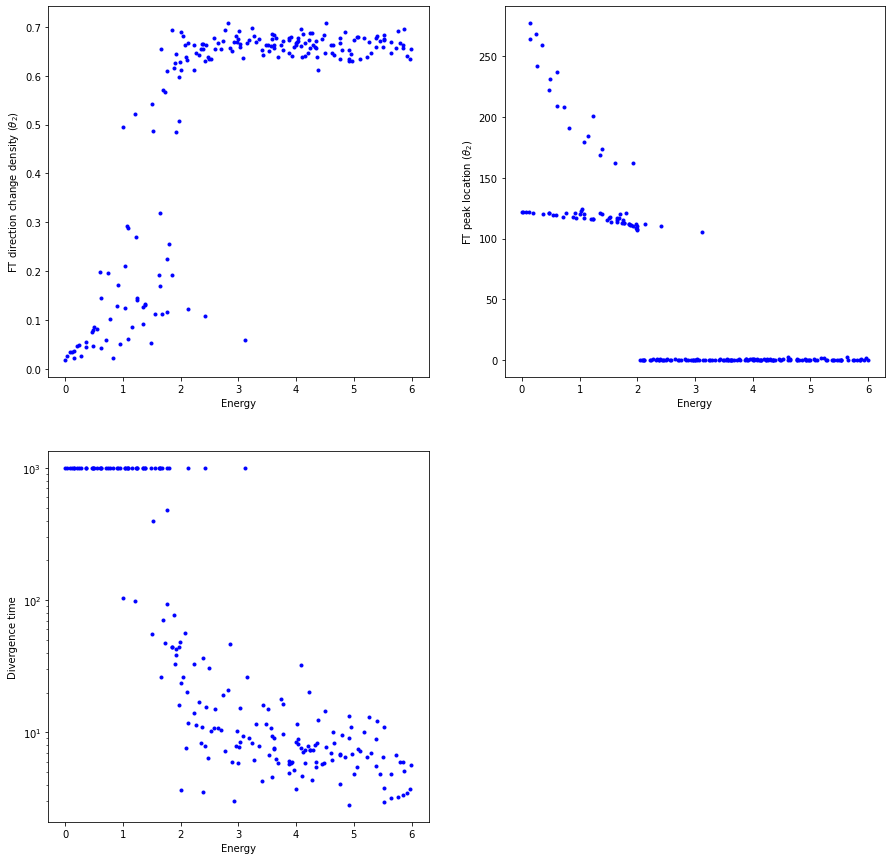

In [13]:
# Plot the results

plt.figure(1, figsize=[15, 15])
plt.subplot(221)
plt.plot(Energy,dirChange,'.b')
plt.ylabel('FT direction change density $(θ_2)$')
plt.xlabel('Energy')
plt.subplot(222)
plt.plot(Energy,peakLoc,'.b')
plt.ylabel('FT peak location $(θ_2)$')
plt.xlabel('Energy')
ax = plt.subplot(223)
plt.plot(Energy,divIdx,'.b')
ax.set_yscale('log')
plt.ylabel('Divergence time')
plt.xlabel('Energy')

As we can see from these plots, there is a clear trend from periodic to chaotic behavior. Especially well this trend is observed in the FT direction change density. The change is observed around $E=2$, which corresponds to $\theta_1=0, \theta_2=\pi$. Interestingly, there is no distinct "critical energy", which would divide these two regions with no exceptions. I suspect that if one could simulate to $t\rightarrow\infty$, then the divide would be more clear. As an example of initial position with high energy and periodic nature, let us look at $\theta_1=\frac{5\pi}{9}, \theta_2=\frac{17\pi}{40}$ with $E\approx2.1$, divergence time of over 100000, FT peak location of 105, and FT direction change density of 0.06.

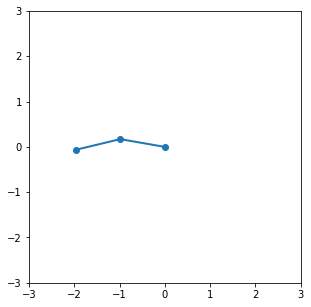

In [14]:
b = 100
N = 100*b
r0 = np.array([t1_ang[5],t2_ang[4],0.0,0.0])
gl = 1
anim = animatePendulum(b, N, r0, gl)
HTML(anim.to_html5_video())

We observe that even though the pedulum has more than enough energy to make it chaotic, it happens to have a trajectory, where the pendulum can returns to its initial position. If we plot the metrics in the same figure, we can see that they are all fairly well correlated:

<IPython.core.display.Javascript object>


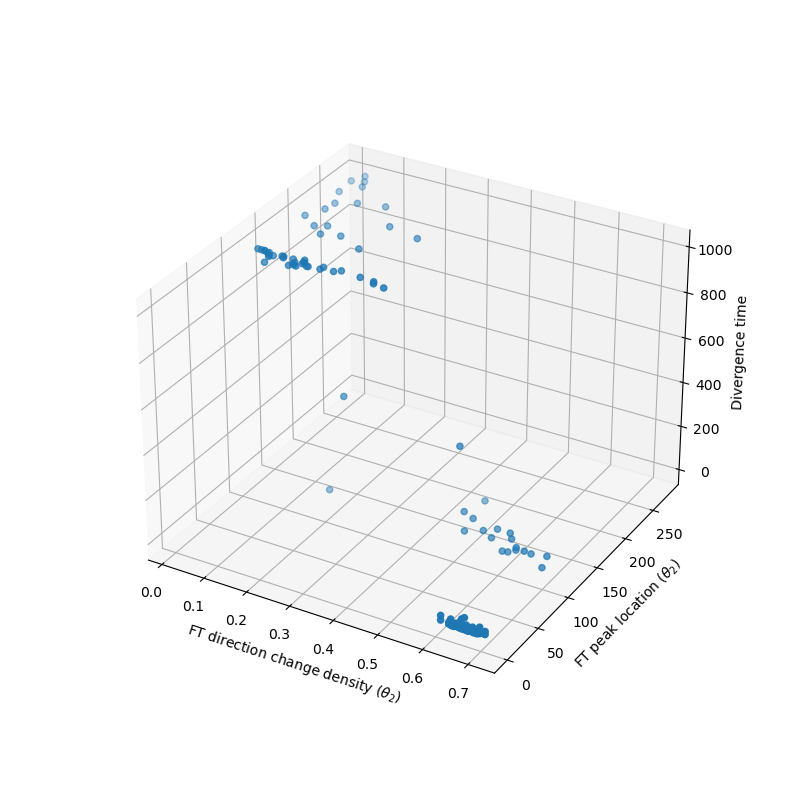

Text(0.5, 0, 'Divergence time')

In [15]:
from mpl_toolkits import mplot3d
# Interactive plot
%matplotlib notebook
fig = plt.figure(figsize=[8, 8])
ax = plt.axes(projection='3d')
ax.scatter3D(dirChange,peakLoc,divIdx,'.b')
ax.set_xlabel('FT direction change density $(θ_2)$')
ax.set_ylabel('FT peak location $(θ_2)$')
ax.set_zlabel('Divergence time')

Here is an another example with$\theta_1=\frac{\pi}{3}, \theta_2=\frac{1\pi}{40}$ with $E\approx1.0$, divergence time of  10400, FT peak location of 120, and FT direction change density of 0.49. It has low energy, but it is still fairly chaotic.

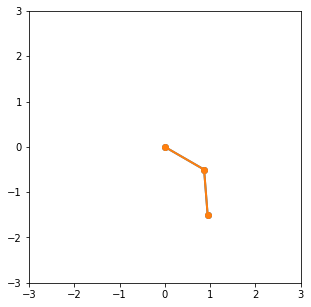

In [16]:
# Run this line to remove the creation of interactive plots
%matplotlib inline

# Could take few minutes to run
b = 1000
N = 100*b
r0 = np.array([[t1_ang[3],t2_ang[0],0.0,0.0],[t1_ang[3],t2_ang[0],0.0,0.01]])
gl = np.array([1,1])
anim = animatePendulum(b, N, r0, gl)
HTML(anim.to_html5_video())

From the animation we can see that the pendulum's oscillation frequency fluctuates a lot with time. A very interesting effect is also that the divergence fluctuates with time as well with local maxima at about $t=100$ (30s) and $t=400$ (120s).

We should also experiment with pendulums where the two arms have different lenghts. For that, we'll need new equations:
\begin{equation}
\begin{cases}
\dot{\theta}_1=\omega_1 \\
\dot{\theta}_2=\omega_2 \\
\dot{\omega}_1=-\frac{l_2m_2\omega_2^2\sin(\theta_1-\theta_2)+l_1m_2\omega_1^2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)+gm_1\sin\theta_1+gm_2\sin\theta_1-gm_2\cos(\theta_1-\theta_2)\sin\theta_2}{l_1(m_1+m_2-m_2\cos^2(\theta_1-\theta_2))} \\
\dot{\omega}_2=\frac{l_1m_1\omega_1^2\sin(\theta_1-\theta_2)+l_1m_2\omega_1^2\sin(\theta_1-\theta_2)+l_2m_2\omega_2^2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)+gm_1\cos(\theta_1-\theta_2)\sin\theta_1+gm_2\cos(\theta_1-\theta_2)\sin\theta_1-gm_1\sin\theta_2-gm_2\sin\theta_2}{l_2(m_1+m_2-m_2\cos^2(\theta_1-\theta_2)}
\end{cases}.
\end{equation}

In [17]:
def f_full(r,const):
    t1 = r[0]; t2 = r[1]; w1 = r[2]; w2 = r[3]
    l1 = const[0]; l2 = const[1]; m1 = const[2]; m2 = const[3]; g  = const[4]
    
    dt = t1-t2
    sinDt = sin(dt)
    cosDt = cos(dt)
    sinT1 = sin(t1)
    sinT2 = sin(t2)
    m12 = m1+m2
    w1_2 = w1*w1
    w2_2 = w2*w2
    low = (m1+m2-m2*cosDt*cosDt)
    
    dw1 = (-m2*(l2*w2_2+l1*w1_2*cosDt)*sinDt-g*m12*sinT1+g*m2*cosDt*sinT2)/(l1*low)
    dw2 = ((l1*m12*w1_2+l2*m2*w2_2*cosDt)*sinDt+g*m12*(cosDt*sinT1-sinT2))/(l2*low)
    
    dt1 = w1
    dt2 = w2
    return np.array([dt1, dt2, dw1, dw2],float)


In [18]:
def RK4solver_full(b, N, r0, const):
    a = 0.0;
    h = (b-a)/N
    tpoints =  np.arange(a,b,h)
    t1points = np.empty(N)
    t2points = np.empty(N)
    w1points = np.empty(N)
    w2points = np.empty(N)
    r = r0.copy()
    for i in range(N):
        t1points[i] = r[0]
        t2points[i] = r[1]
        w1points[i] = r[2]
        w2points[i] = r[3]
        k1 = h*f_full(r,const)
        k2 = h*f_full(r+0.5*k1,const)
        k3 = h*f_full(r+0.5*k2,const)
        k4 = h*f_full(r+k3,const)
        r += (k1+2*k2+2*k3+k4)/6
    return tpoints, t1points, t2points, w1points, w2points

In [19]:
def animatePendulum_full(b, N, r0s, const):
    n = r0s.size // 4 # Number of pendulums
    t1p = np.empty([n,N])
    t2p = np.empty([n,N])
    
    l1 = const[0]
    l2 = const[1]
    l12 = l1+l2

    for i in range(n):
        if n>1:
            tpoints, t1points, t2points, w1points, w2points = RK4solver_full(b, N, r0s[i,:], const[i,:])
        else:
            tpoints, t1points, t2points, w1points, w2points = RK4solver_full(b, N, r0s, const)
        t1p[i,:] = t1points
        t2p[i,:] = t2points
        
    x1 = l1*np.sin(t1p)
    y1 = -l1*np.cos(t1p)
    x2 = l2*np.sin(t2p) + x1
    y2 = -l2*np.cos(t2p) + y1
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(autoscale_on=False, xlim=(-l12-1, l12+1), ylim=(-l12-1, l12+1))
    ax.set_aspect('equal')
    
    lines = []
    
    for i in range(n):
        lines.append(ax.plot([], [], 'o-', lw=2))
    
    def animate(i):
        i *= 10
        for j in range(n):
            x = [0, x1[j,i], x2[j,i]]
            y = [0, y1[j,i], y2[j,i]]
            lines[j][0].set_data(x, y)
    
    return animation.FuncAnimation(fig, animate, N//10, interval=30)

In [20]:
# Here are some helper functions

def T_full(r,const): # Kinetic energy
    l1 = const[0]; l2 = const[1]; m1 = const[2]; m2 = const[3]; g  = const[4]
    t1 = r[0]; t2 = r[1]; w1 = r[2]; w2 = r[3]
    return 0.5*(m1+m2)*l1*l1*w1*w1+0.5*m2*l2*l2*w2*w2+m2*l1*l2*w1*w2*cos(t1-t2)

def V_full(r,const): # Potential energy
    l1 = const[0]; l2 = const[1]; m1 = const[2]; m2 = const[3]; g  = const[4]
    t1 = r[0]; t2 = r[1]; w1 = r[2]; w2 = r[3]
    return -g*(m1+m2)*l1*cos(t1)-g*m2*l2*cos(t2)+(g*(m1+m2)*l1+g*m2*l2)

def E_full(r,const): # Total energy
    return T_full(r,const) + V_full(r,const)

def divergenceIndex_full(t1_1, t2_1, t1_2, t2_2, const, N, tolerance = 0.1):
    l1 = const[0]; l2 = const[1]; m1 = const[2]; m2 = const[3]; g  = const[4]
    limit = tolerance*tolerance
    cosDf = l1*(np.cos(t1_1[0:N])-np.cos(t1_2[0:N]))+l2*(np.cos(t2_2[0:N])-np.cos(t2_2[0:N]))
    sinDf = l1*(np.sin(t1_1[0:N])-np.sin(t1_2[0:N]))+l2*(np.sin(t2_2[0:N])-np.sin(t2_2[0:N]))
    LocDiff = cosDf*cosDf + sinDf*sinDf
    idx = np.where(LocDiff >= limit)
    if idx[0].size == 0:
        return N
    else:
        return idx[0][0]

We consider the case where $l_2=3l_1$ and calculate the same metrics again.

In [21]:
b = 400 # Runs for about 15 min
b_small = 60
N = 100*b
N_small = 100*b_small
const = np.array([1,3,1,1,1])
t1_ang = np.linspace(0,pi,10)
t2_ang = np.linspace(0,2*pi,21) + pi/40.0
Energy_full = np.empty(200)
dirChange_full = np.empty(200)
peakLoc_full = np.empty(200)
divIdx_full = np.empty(200)

for i in range(10):
    t1_0 = t1_ang[i]
    for j in range(20):
        t2_0 = t2_ang[j]
        r0 = [t1_0,t2_0,0.0,0.0]
        r0off = [t1_0,t2_0,0.0,0.01]
        tpoints, t1_1, t2_1, w1p, w2p = RK4solver_full(b, N, r0, const)
        tpoints, t1_2, t2_2, w1p, w2p = RK4solver_full(b_small, N_small, r0off, const)
        
        if np.max(t1_1) > 2*pi:
            t1_1 -= 2*pi
        if np.max(t2_1) > 2*pi:
            t2_1 -= 2*pi
        if np.max(t1_2) > 2*pi:
            t1_2 -= 2*pi
        if np.max(t2_2) > 2*pi:
            t2_2 -= 2*pi
        
        t2_F = np.abs(np.fft.fft(t2_1))
        
        Energy_full[20*i+j] = E_full(r0,const)
        dirChange_full[20*i+j] = directionChangeDensity(D(t2_F[0:200])) # Low-pass filter, since the last indexes might have strong peaks.
        peakLoc_full[20*i+j] = maxPeakLocation(t2_F[0:200])
        divIdx_full[20*i+j] = divergenceIndex_full(t1_1, t2_1, t1_2, t2_2, const, N_small) / 100


Text(0.5, 0, 'Energy')

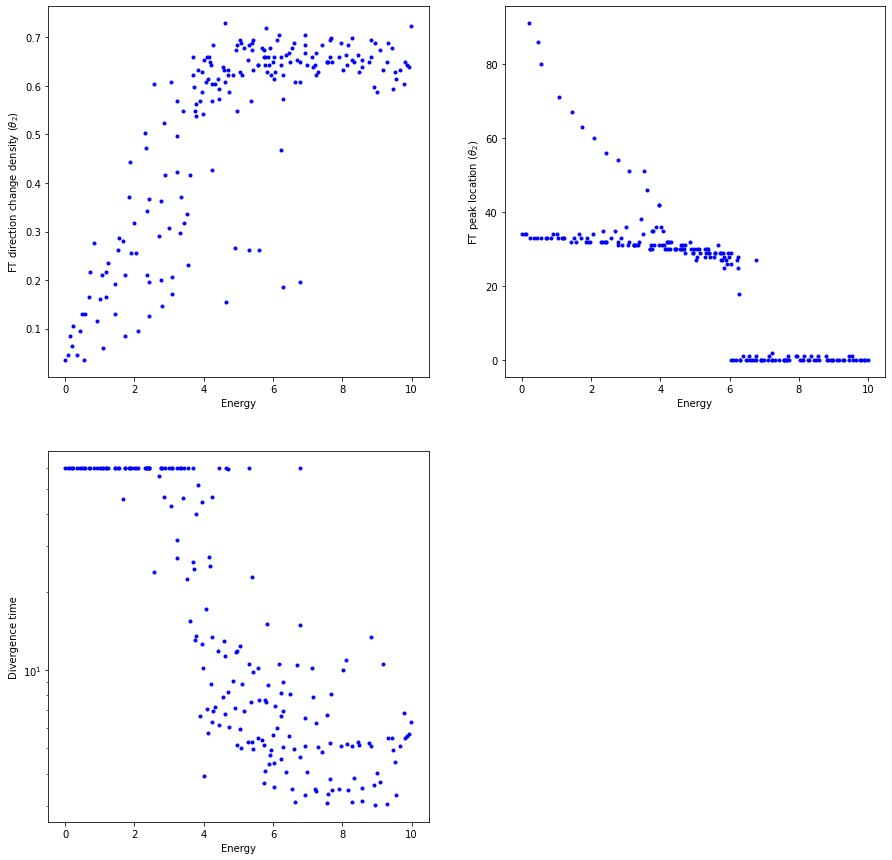

In [22]:
# Plot the results

plt.figure(1, figsize=[15, 15])
plt.subplot(221)
plt.plot(Energy_full,dirChange_full,'.b')
plt.ylabel('FT direction change density $(θ_2)$')
plt.xlabel('Energy')
plt.subplot(222)
plt.plot(Energy_full,peakLoc_full,'.b')
plt.ylabel('FT peak location $(θ_2)$')
plt.xlabel('Energy')
ax = plt.subplot(223)
plt.plot(Energy_full,divIdx_full,'.b')
ax.set_yscale('log')
plt.ylabel('Divergence time')
plt.xlabel('Energy')

We observe, that the transition occurs between $E=4$ and $E=6$, corresponding to $\theta_1=pi/2, \theta_2=0$ and $\theta_1=0, \theta_2=pi/2$ respectively. 

## Discussion

The first hypothesis was that there would be a critical temperature, below which the pendulum would always be periodic, and above which the system would turn chaotic. Clearly this is not the case and the transition period is more gradual. However, based on the figures, it can be estimated that the transition is near energies, where at least one of the pendulums can spin around its pivot. While this might seem very intuitive, I wouldn't consider it as such for the divergence time metric.

My second hypothesis was that periodic system would have Fourier transform with few narrow and distinct peaks, and a chaotic system would have broader distribution, but still identifiable peaks. The first part is true based on the plot above, which compare a chaotic and periodic Fourier transforms. There are, however, smaller peaks as well. The second part is only partly true. The chaotic distribution in the plot is very broad and noisy, but there are no identifiable peaks.

During the project, I observed that the calculations were computationally more expensive than initially thought. This meant that I had to sacrifice the accuracy of the simulations a bit. However, I believe that this didn't have a massive impact on the results of this project.

Overall, the project was successful. The results were against the hypothesis, but this allowed for me to learn more about the behavior of the double pendulum.

## Appendix

### Timestep size
In this part I explore how stable the system is depending on the timestep. First, a chaotic system:

Text(0, 0.5, 'Divergence time')

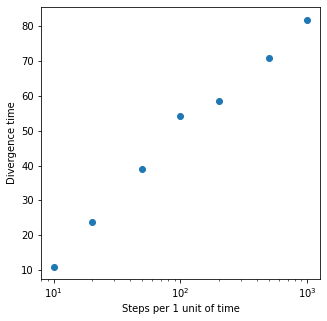

In [23]:
b = 100
Ns = np.array([10, 20, 50, 100, 200, 500, 1000])*b
r0 = np.array([pi,3*pi/4.0,0.0,0.0])
gl = 1

dirChange_ts = np.empty(len(Ns))

tp_base, t1_base, t2_base, w1p, w2p = RK4solver(b, 10000*b, r0, gl) # baseline = 10000*b

for i in range(len(Ns)):
    N = Ns[i]
    tpoints, t1, t2, w1p, w2p = RK4solver(b, N, r0, gl)
    t1_c = t1_base[::(10000*b//N)]
    t2_c = t2_base[::(10000*b//N)]
    
    dirChange_ts[i] = divergenceIndex(t1, t2, t1_c, t2_c)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
plt.scatter(Ns / b,dirChange_ts / Ns * b)
ax.set_xscale('log')
plt.xlabel('Steps per 1 unit of time')
plt.ylabel('Divergence time')

We notice that the divergence time $t_\mathrm{d}\propto10^N$, where N is the number of steps. Next, a periodic system:

Text(0, 0.5, 'Divergence time')

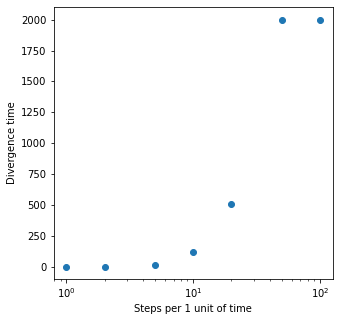

In [24]:
b = 2000
Ns = np.array([1, 2, 5, 10, 20, 50, 100])*b
r0 = np.array([0,3*pi/4.0,0.0,0.0])
gl = 1

dirChange_ts = np.empty(len(Ns))

tp_base, t1_base, t2_base, w1p, w2p = RK4solver(b, 1000*b, r0, gl) # baseline = 1000*b

for i in range(len(Ns)):
    N = Ns[i]
    tpoints, t1, t2, w1p, w2p = RK4solver(b, N, r0, gl)
    t1_c = t1_base[::(1000*b//N)]
    t2_c = t2_base[::(1000*b//N)]
    
    dirChange_ts[i] = divergenceIndex(t1, t2, t1_c, t2_c)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
plt.scatter(Ns / b,dirChange_ts / Ns * b)
ax.set_xscale('log')
plt.xlabel('Steps per 1 unit of time')
plt.ylabel('Divergence time')

For the periodic system, we find that even quite large time steps are very accurate. The two fixed values at 2000 indicate that there was no divergence in the simulated timespan. The simulations in the main secion were done with 100 steps per 1 unit of time as that should be enough to differentiate between a chaotic and a periodic system.

## Conservation of energy

In the simulations, I used the RK4 algorithm to solve the differential equations. This method doesn't conserve energy, so we should investigate how much the energy deviates with respect to time. First, lets look into the same chaotic system:

In [25]:
# Helper functions
def T_c(r,const): # Kinetic energy
    l1 = const[0]; l2 = const[1]; m1 = const[2]; m2 = const[3]; g  = const[4]
    t1 = r[0,:]; t2 = r[1,:]; w1 = r[2,:]; w2 = r[3,:]
    return 0.5*(m1+m2)*l1*l1*w1*w1+0.5*m2*l2*l2*w2*w2+m2*l1*l2*w1*w2*np.cos(t1-t2)

def V_c(r,const): # Potential energy
    l1 = const[0]; l2 = const[1]; m1 = const[2]; m2 = const[3]; g  = const[4]
    t1 = r[0,:]; t2 = r[1,:]; w1 = r[2,:]; w2 = r[3,:]
    return -g*(m1+m2)*l1*np.cos(t1)-g*m2*l2*np.cos(t2)+(g*(m1+m2)*l1+g*m2*l2)

def E_c(r,const): # Total energy
    return T_c(r,const) + V_c(r,const)

Text(0.5, 0, 'Time')

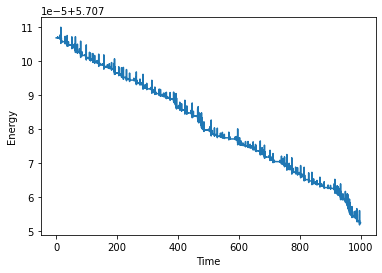

In [26]:
b = 1000
N = 100*b
r0 = np.array([pi,3*pi/4,0.0,0.0])
const = np.array([1,1,1,1,1])

tp, t1, t2, w1, w2 = RK4solver_full(b, N, r0, const)
ener = E_c(np.array([t1,t2,w1,w2]),const)
plt.plot(tp,ener)
plt.ylabel('Energy')
plt.xlabel('Time')

We find that the energy loss is less than $10^{-4}$, so it shouldn't be an issue. The same holds if the second pendulum has longer arm:

Text(0.5, 0, 'Time')

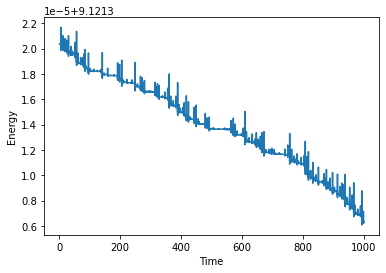

In [27]:
b = 1000
N = 100*b
r0 = np.array([pi,3*pi/4,0.0,0.0])
const = np.array([1,3,1,1,1])

tp, t1, t2, w1, w2 = RK4solver_full(b, N, r0, const)
ener = E_c(np.array([t1,t2,w1,w2]),const)
plt.plot(tp,ener)
plt.ylabel('Energy')
plt.xlabel('Time')

However, if, for example, the mass of the first pendulum is very small, there are significant numerical errors, and most of the energy is lost:

Text(0.5, 0, 'Time')

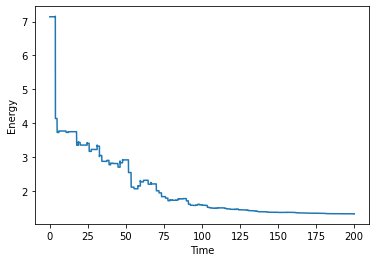

In [28]:
b = 200
N = 100*b
r0 = np.array([pi,3*pi/4,0.0,0.0])
const = np.array([1,3,0.01,1,1])

tp, t1, t2, w1, w2 = RK4solver_full(b, N, r0, const)
ener = E_c(np.array([t1,t2,w1,w2]),const)
plt.plot(tp,ener)
plt.ylabel('Energy')
plt.xlabel('Time')

Animating this situation, we can see the energy loss happens when the velocity is high:

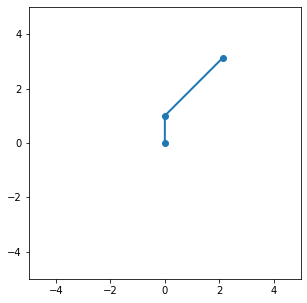

In [29]:
b = 100
N = 100*b
r0 = np.array([pi,3*pi/4,0.0,0.0])
const = np.array([1,3,0.01,1,1])

anim = animatePendulum_full(b, N, r0, const)
HTML(anim.to_html5_video())